In [1]:
import pandas as pd
data=pd.read_csv('spam_or_not_spam.csv')
data.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [2]:
data['label'].where(data['label']==1).count()
data['label'].where(data['label']==0).count()

np.int64(2500)

In [2]:
#EDA
data.describe(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


(             label
 count  3000.000000
 mean      0.166667
 std       0.372740
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       0.000000
 max       1.000000,
 None)

In [3]:
data.isna().sum()

email    1
label    0
dtype: int64

In [4]:
data.dropna(subset=['email'],inplace=True)

In [5]:
data.isna().sum()
data['label'].value_counts()

label
0    2500
1     499
Name: count, dtype: int64

In [6]:
import plotly.graph_objects as go
count=data['label'].value_counts()
fig=go.Figure(data=[go.Bar(name='Email Type',x=['Not Spam (0)','Spam (1)'],y=count,marker_color='skyblue')])
fig.update_layout(
    title='Distribution of spam vs not spam',
    xaxis_title='Email type',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()


In [7]:
# Creating a pie chart to visualize the distribution of spam vs not spam

fig = go.Figure(data=[go.Pie(
    labels=['Not Spam (0)', 'Spam (1)'],
    values=count,
    hole=0.3,  # For a donut chart, setting hole > 0 creates the "donut" effect
    marker=dict(colors=['#636EFA', '#EF553B'])
)])

# Adding layout details
fig.update_layout(
    title='Distribution of Spam vs Not Spam Emails',
    template='plotly_white'
)

# Display the plot
fig.show()


In [8]:
# Creating an interactive histogram for email length distribution with better binning using Plotly Graph Objects
fig = go.Figure()
max_length = data['email_length'].max()

# Adding histogram for email length
fig.add_trace(go.Histogram(
    x=data[data['label']==0]['email_length'],
    nbinsx=400,
    name='Not Spam',
    marker_color='#FFA15A',
    opacity=0.75
))


# Adding histogram for email length
fig.add_trace(go.Histogram(
    x=data[data['label']==1]['email_length'],
    nbinsx=400,
    name='Spam',
    marker_color='#1f77b4',
    opacity=0.75
))

# Updating layout details for better visualization
fig.update_layout(
    title='Distribution of Email Lengths',
    xaxis_title='Email Length (characters)',
    yaxis_title='Frequency',
    template='plotly_white',
    bargap=0.1,
    xaxis=dict(range=[0, max_length])
)

# Display the plot
fig.show()


KeyError: 'email_length'

In [53]:
import plotly.express as px

# Creating an interactive scatter plot using Plotly
fig = px.scatter(
    data,
    x='label',
    y='email_length',
    color='label',
    labels={'label': 'Email Type (0 = Not Spam, 1 = Spam)', 'email_length': 'Email Length (characters)'},
    title='Interactive Scatter Plot of Email Length vs. Label',
    color_continuous_scale=['#636EFA', '#EF553B'],
    category_orders={"label": [0, 1]},
)

# Updating layout for better readability
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Spam', 'Spam']
    ),
    template='plotly_white'
)

# Display the plot
fig.show()


1.The dataset originally contained 2,500 "Not Spam" emails and 500 "Spam" emails. After removing a record with a missing value we have 2500 "Not Spam" and 499 "Spam" samples.
2.Since the dataset is imbalanced with more "Not Spam" than "Spam" emails, we should consider splitting the data in a balanced manner to avoid bias in the model results.
3.Regarding the distribution of email lengths, "Spam" emails include one with a particularly large length, while most have fewer than 999 characters. "Not Spam" emails have a higher count across the range of lengths.

In [ ]:
#Balance the dataset
#Method -1 Undersampling
#Method -2 Oversampling
#class weight Adjustment


In [9]:
df=data.copy()

In [10]:
from sklearn.utils import resample
not_spam=df[df['label']==0]
spam=df[df['label']==1]
not_spam_downsample=resample(not_spam,replace=False,n_samples=len(spam),random_state=42)
balanced_df_undersample=pd.concat([not_spam_downsample,spam])
balanced_df_undersample=balanced_df_undersample.sample(frac=1,random_state=42).reset_index(drop=True)
balanced_df_undersample['label'].value_counts()

label
0    499
1    499
Name: count, dtype: int64

In [62]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
import numpy as np
# Defining the feature and label columns
X = df['email']
y = df['label']

# Converting the text data into numerical features using Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english',lowercase=True,max_features=10000)
X_count = count_vectorizer.fit_transform(X)

# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled_count, y_resampled_count = smote.fit_resample(X_count, y)

# Displaying the distribution of resampled labels
unique, counts = np.unique(y_resampled_count, return_counts=True)
print("Distribution after SMOTE oversampling:", dict(zip(unique, counts)))


Distribution after SMOTE oversampling: {np.int64(0): np.int64(2500), np.int64(1): np.int64(2500)}


In [17]:
from sklearn.model_selection import train_test_split
X_undersampled=balanced_df_undersample['email']
y_undersampled=balanced_df_undersample['label']

X_undersampled_count=count_vectorizer.fit_transform(X_undersampled)
X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_undersampled_count,y_undersampled,test_size=0.3,random_state=42,stratify=y_undersampled)
print("Undersampled Training Set Size:", X_train_under.shape[0])
print("Undersampled Testing Set Size:", X_test_under.shape[0])

Undersampled Training Set Size: 698
Undersampled Testing Set Size: 300


In [18]:
from sklearn.model_selection import train_test_split

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_count, y_resampled_count, test_size=0.3, random_state=42,stratify=y_resampled_count)
print("SMOTE-Resampled Training Set Size:", X_train_smote.shape[0])
print("SMOTE-Resampled Testing Set Size:", X_test_smote.shape[0])


SMOTE-Resampled Training Set Size: 3500
SMOTE-Resampled Testing Set Size: 1500


In [19]:
X_train_smote.shape

(3500, 10000)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from tabulate import tabulate

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, important_features=None):
    """
    Trains and evaluates the given model using the specified training and testing data.

    Parameters:
    - model: The model to train (e.g., RandomForestClassifier).
    - X_train: The training feature dataset.
    - y_train: The training labels.
    - X_test: The testing feature dataset.
    - y_test: The testing labels.
    - important_features: List of important features to use (default is None, use all features).

    Returns:
    - accuracy: Accuracy score of the model on the test set.
    - report: Classification report for the model's predictions.
    """
    # Use only the important features if provided
    if important_features is not None:
        X_train = X_train[important_features]
        X_test = X_test[important_features]

    # Convert sparse matrices to dense if necessary
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

def train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under, 
                               X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features=None):
    # List of models to train
    models = [
        ("Random Forest", RandomForestClassifier(random_state=42,class_weight='balanced')),
        ("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("Logistic Regression", LogisticRegression(random_state=42,class_weight='balanced')),
        ("K-Neighbors Classifier", KNeighborsClassifier()),
        ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB()),
        ("Support Vector Machine", SVC(probability=True, random_state=42,class_weight='balanced')),
        ("AdaBoost", AdaBoostClassifier(random_state=42)),
        ("Bagging Classifier", BaggingClassifier(random_state=42)),
        ("Voting Classifier", VotingClassifier(estimators=[
            ('lr', LogisticRegression(random_state=42,class_weight='balanced')),
            ('rf', RandomForestClassifier(random_state=42,class_weight='balanced')),
            ('gnb', MultinomialNB())
        ], voting='soft'))
    ]

    metrics_under = []
    metrics_smote = []

    # Train and evaluate each model on both undersampled and SMOTE-resampled datasets
    for model_name, model in models:
        print(f"\nTraining {model_name} on Undersampled Data...")
        accuracy_under, report_under = train_and_evaluate_model(model, X_train_under, y_train_under, X_test_under, y_test_under, important_features)
        metrics_under.append((model_name, accuracy_under, report_under))

        print(f"\nTraining {model_name} on SMOTE-Resampled Data...")
        accuracy_smote, report_smote = train_and_evaluate_model(model, X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features)
        metrics_smote.append((model_name, accuracy_smote, report_smote))

    # Display results in a tabular format for undersampled data
    print("\nResults for Undersampled Data:")
    print(tabulate(metrics_under, headers=["Model", "Accuracy", "Classification Report"], tablefmt="pretty", floatfmt=".4f"))

    # Display results in a tabular format for SMOTE-resampled data
    print("\nResults for SMOTE-Resampled Data:")
    print(tabulate(metrics_smote, headers=["Model", "Accuracy", "Classification Report"], tablefmt="pretty", floatfmt=".4f"))

    return metrics_under, metrics_smote

# Example usage of the modified function
# Assuming X_train_under, X_test_under, y_train_under, y_test_under are from the undersampled dataset
# and X_train_smote, X_test_smote, y_train_smote, y_test_smote are from the SMOTE-resampled dataset

# Uncomment and run this part once you have the required datasets
# metrics_under, metrics_smote = train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under,
#                                                          X_train_smote, y_train_smote, X_test_smote, y_test_smote)


In [17]:
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [21]:

# Example usage of the modified function
# Assuming X_train_under, X_test_under, y_train_under, y_test_under are from the undersampled dataset
# and X_train_smote, X_test_smote, y_train_smote, y_test_smote are from the SMOTE-resampled dataset

# Uncomment and run this part once you have the required datasets
metrics_under, metrics_smote = train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under,
                                                       X_train_smote, y_train_smote, X_test_smote, y_test_smote)



Training Random Forest on Undersampled Data...

Training Random Forest on SMOTE-Resampled Data...

Training Decision Tree on Undersampled Data...

Training Decision Tree on SMOTE-Resampled Data...

Training Logistic Regression on Undersampled Data...

Training Logistic Regression on SMOTE-Resampled Data...

Training K-Neighbors Classifier on Undersampled Data...

Training K-Neighbors Classifier on SMOTE-Resampled Data...

Training Gradient Boosting on Undersampled Data...

Training Gradient Boosting on SMOTE-Resampled Data...

Training Naive Bayes on Undersampled Data...

Training Naive Bayes on SMOTE-Resampled Data...

Training Support Vector Machine on Undersampled Data...

Training Support Vector Machine on SMOTE-Resampled Data...

Training AdaBoost on Undersampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training AdaBoost on SMOTE-Resampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training Bagging Classifier on Undersampled Data...

Training Bagging Classifier on SMOTE-Resampled Data...

Training Voting Classifier on Undersampled Data...

Training Voting Classifier on SMOTE-Resampled Data...

Results for Undersampled Data:
+------------------------+--------------------+-------------------------------------------------------+
|         Model          |      Accuracy      |                 Classification Report                 |
+------------------------+--------------------+-------------------------------------------------------+
|     Random Forest      | 0.9566666666666667 |        precision    recall  f1-score   support        |
|                        |                    |                                                       |
|                        |                    |            0       0.97      0.95      0.96       150 |
|                        |                    |            1       0.95      0.97      0.96       150 |
|                       

As the result and accuracy cleary indicates SMOTE + RandomForest,Logistic Regression
Voting Classifier - 99%

In [22]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, important_features=None):
    """
    Trains and evaluates the given model using the specified training and testing data.

    Parameters:
    - model: The model to train (e.g., RandomForestClassifier).
    - X_train: The training feature dataset.
    - y_train: The training labels.
    - X_test: The testing feature dataset.
    - y_test: The testing labels.
    - important_features: List of important features to use (default is None, use all features).

    Returns:
    - train_accuracy: Accuracy score of the model on the training set.
    - train_report: Classification report for the model's predictions on the training set.
    - test_accuracy: Accuracy score of the model on the test set.
    - test_report: Classification report for the model's predictions on the test set.
    """
    # Use only the important features if provided
    if important_features is not None:
        X_train = X_train[important_features]
        X_test = X_test[important_features]

    # Convert sparse matrices to dense if necessary
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the training set
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_report = classification_report(y_train, y_pred_train)

    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_report = classification_report(y_test, y_pred_test)

    return train_accuracy, train_report, test_accuracy, test_report

def train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under, 
                               X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features=None):
    # List of models to train
    models = [
        ("Random Forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
        ("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("Logistic Regression", LogisticRegression(random_state=42, class_weight='balanced')),
        ("K-Neighbors Classifier", KNeighborsClassifier()),
        ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB()),
        ("Support Vector Machine", SVC(C=10,gamma='scale',kernel="rbf", probability=True, random_state=42, class_weight='balanced')),
        ("AdaBoost", AdaBoostClassifier(random_state=42)),
        ("Bagging Classifier", BaggingClassifier(random_state=42)),
        ("Voting Classifier", VotingClassifier(estimators=[
            ('lr', LogisticRegression(random_state=42, class_weight='balanced')),
            ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
            ('gnb', MultinomialNB())
        ], voting='soft'))
    ]

    metrics_under = []
    metrics_smote = []

    # Train and evaluate each model on both undersampled and SMOTE-resampled datasets
    for model_name, model in models:
        print(f"\nTraining {model_name} on Undersampled Data...")
        train_acc_under, train_report_under, test_acc_under, test_report_under = train_and_evaluate_model(
            model, X_train_under, y_train_under, X_test_under, y_test_under, important_features)
        metrics_under.append((model_name, train_acc_under, train_report_under, test_acc_under, test_report_under))

        print(f"\nTraining {model_name} on SMOTE-Resampled Data...")
        train_acc_smote, train_report_smote, test_acc_smote, test_report_smote = train_and_evaluate_model(
            model, X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features)
        metrics_smote.append((model_name, train_acc_smote, train_report_smote, test_acc_smote, test_report_smote))

    # Display results in a tabular format for undersampled data
    print("\nResults for Undersampled Data:")
    print(tabulate(
        metrics_under,
        headers=["Model", "Train Accuracy", "Train Classification Report", "Test Accuracy", "Test Classification Report"],
        tablefmt="pretty", floatfmt=".4f"))

    # Display results in a tabular format for SMOTE-resampled data
    print("\nResults for SMOTE-Resampled Data:")
    print(tabulate(
        metrics_smote,
        headers=["Model", "Train Accuracy", "Train Classification Report", "Test Accuracy", "Test Classification Report"],
        tablefmt="pretty", floatfmt=".4f"))

    return metrics_under, metrics_smote


In [23]:

# Uncomment and run this part once you have the required datasets
metrics_under, metrics_smote = train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under,
                                                       X_train_smote, y_train_smote, X_test_smote, y_test_smote)



Training Random Forest on Undersampled Data...

Training Random Forest on SMOTE-Resampled Data...

Training Decision Tree on Undersampled Data...

Training Decision Tree on SMOTE-Resampled Data...

Training Logistic Regression on Undersampled Data...

Training Logistic Regression on SMOTE-Resampled Data...

Training K-Neighbors Classifier on Undersampled Data...

Training K-Neighbors Classifier on SMOTE-Resampled Data...

Training Gradient Boosting on Undersampled Data...

Training Gradient Boosting on SMOTE-Resampled Data...

Training Naive Bayes on Undersampled Data...

Training Naive Bayes on SMOTE-Resampled Data...

Training Support Vector Machine on Undersampled Data...

Training Support Vector Machine on SMOTE-Resampled Data...

Training AdaBoost on Undersampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training AdaBoost on SMOTE-Resampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training Bagging Classifier on Undersampled Data...

Training Bagging Classifier on SMOTE-Resampled Data...

Training Voting Classifier on Undersampled Data...

Training Voting Classifier on SMOTE-Resampled Data...

Results for Undersampled Data:
+------------------------+--------------------+-------------------------------------------------------+--------------------+-------------------------------------------------------+
|         Model          |   Train Accuracy   |              Train Classification Report              |   Test Accuracy    |              Test Classification Report               |
+------------------------+--------------------+-------------------------------------------------------+--------------------+-------------------------------------------------------+
|     Random Forest      |        1.0         |        precision    recall  f1-score   support        | 0.9566666666666667 |        precision    recall  f1-score   support        |
|                        |  

In [28]:
def train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under, 
                               X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features=None):
    # List of models to train
    models = [
    ("Random Forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42, class_weight='balanced')),
    ("K-Neighbors Classifier", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Support Vector Machine", SVC(C=10, gamma='scale', kernel="rbf", probability=True, random_state=42, class_weight='balanced')),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Bagging Classifier", BaggingClassifier(random_state=42)),
    ("Voting Classifier", VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42, class_weight='balanced')),
        ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
        ('gnb', MultinomialNB())
    ], voting='soft'))
]
    metrics_under = []
    metrics_smote = []

    # Train and evaluate each model on both undersampled and SMOTE-resampled datasets
    for model_name, model in models:
        print(f"\nTraining {model_name} on Undersampled Data...")
        train_acc_under, train_report_under, test_acc_under, test_report_under = train_and_evaluate_model(
            model, X_train_under, y_train_under, X_test_under, y_test_under, important_features)
        accuracy_diff_under = abs(train_acc_under - test_acc_under)
        metrics_under.append((model_name, train_acc_under, train_report_under, test_acc_under, test_report_under, accuracy_diff_under))

        print(f"\nTraining {model_name} on SMOTE-Resampled Data...")
        train_acc_smote, train_report_smote, test_acc_smote, test_report_smote = train_and_evaluate_model(
            model, X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features)
        accuracy_diff_smote = abs(train_acc_smote - test_acc_smote)
        metrics_smote.append((model_name, train_acc_smote, train_report_smote, test_acc_smote, test_report_smote, accuracy_diff_smote))

    # Display results in a tabular format for undersampled data
    print("\nResults for Undersampled Data:")
    print(tabulate(
        metrics_under,
        headers=["Model", "Train Accuracy", "Train Classification Report", "Test Accuracy", "Test Classification Report", "Accuracy Diff"],
        tablefmt="pretty", floatfmt=".4f"))

    # Display results in a tabular format for SMOTE-resampled data
    print("\nResults for SMOTE-Resampled Data:")
    print(tabulate(
        metrics_smote,
        headers=["Model", "Train Accuracy", "Train Classification Report", "Test Accuracy", "Test Classification Report", "Accuracy Diff"],
        tablefmt="pretty", floatfmt=".4f"))

    # Identify Top-4 Models with Smallest Accuracy Difference for Undersampled Data
    sorted_under = sorted(metrics_under, key=lambda x: x[5])[:4]
    print("\nTop 4 Models with Smallest Accuracy Difference (Undersampled Data):")
    for model in sorted_under:
        print(f"Model: {model[0]}, Accuracy Diff: {model[5]:.4f}")

    # Identify Top-4 Models with Smallest Accuracy Difference for SMOTE Data
    sorted_smote = sorted(metrics_smote, key=lambda x: x[5])[:4]
    print("\nTop 4 Models with Smallest Accuracy Difference (SMOTE Data):")
    for model in sorted_smote:
        print(f"Model: {model[0]}, Accuracy Diff: {model[5]:.4f}")

    return metrics_under, metrics_smote, sorted_under, sorted_smote


In [29]:

# Uncomment and run this part once you have the required datasets
metrics_under, metrics_smote ,sorted_under, sorted_smote= train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under,
                                                       X_train_smote, y_train_smote, X_test_smote, y_test_smote)



Training Random Forest on Undersampled Data...

Training Random Forest on SMOTE-Resampled Data...

Training Decision Tree on Undersampled Data...

Training Decision Tree on SMOTE-Resampled Data...

Training Logistic Regression on Undersampled Data...

Training Logistic Regression on SMOTE-Resampled Data...

Training K-Neighbors Classifier on Undersampled Data...

Training K-Neighbors Classifier on SMOTE-Resampled Data...

Training Gradient Boosting on Undersampled Data...

Training Gradient Boosting on SMOTE-Resampled Data...

Training Naive Bayes on Undersampled Data...

Training Naive Bayes on SMOTE-Resampled Data...

Training Support Vector Machine on Undersampled Data...

Training Support Vector Machine on SMOTE-Resampled Data...

Training AdaBoost on Undersampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training AdaBoost on SMOTE-Resampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training Bagging Classifier on Undersampled Data...

Training Bagging Classifier on SMOTE-Resampled Data...

Training Voting Classifier on Undersampled Data...

Training Voting Classifier on SMOTE-Resampled Data...

Results for Undersampled Data:
+------------------------+--------------------+-------------------------------------------------------+--------------------+-------------------------------------------------------+----------------------+
|         Model          |   Train Accuracy   |              Train Classification Report              |   Test Accuracy    |              Test Classification Report               |    Accuracy Diff     |
+------------------------+--------------------+-------------------------------------------------------+--------------------+-------------------------------------------------------+----------------------+
|     Random Forest      |        1.0         |        precision    recall  f1-score   support        | 0.9566666666666667 |        precisio

In [53]:
def train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under, 
                               X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features=None):
    # List of models to train
    models = [
    ("Random Forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42, class_weight='balanced')),
    ("K-Neighbors Classifier", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Support Vector Machine", SVC(C=10, gamma='scale', kernel="rbf", probability=True, random_state=42, class_weight='balanced')),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Bagging Classifier", BaggingClassifier(random_state=42)),
    ("Voting Classifier", VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42, class_weight='balanced')),
        ('rf', SVC(C=10, gamma='scale', kernel="rbf", probability=True, random_state=42, class_weight='balanced')),
        ('gnb', MultinomialNB())
    ], voting='soft'))
]
    metrics_under = []
    metrics_smote = []

    # Train and evaluate each model on both undersampled and SMOTE-resampled datasets
    for model_name, model in models:
        print(f"\nTraining {model_name} on Undersampled Data...")
        train_acc_under, train_report_under, test_acc_under, test_report_under = train_and_evaluate_model(
            model, X_train_under, y_train_under, X_test_under, y_test_under, important_features)
        accuracy_diff_under = abs(train_acc_under - test_acc_under)
        metrics_under.append((model_name, train_acc_under, train_report_under, test_acc_under, test_report_under, accuracy_diff_under))

        print(f"\nTraining {model_name} on SMOTE-Resampled Data...")
        train_acc_smote, train_report_smote, test_acc_smote, test_report_smote = train_and_evaluate_model(
            model, X_train_smote, y_train_smote, X_test_smote, y_test_smote, important_features)
        accuracy_diff_smote = abs(train_acc_smote - test_acc_smote)
        metrics_smote.append((model_name, train_acc_smote, train_report_smote, test_acc_smote, test_report_smote, accuracy_diff_smote))

    # Display results in a tabular format for undersampled data
    print("\nResults for Undersampled Data:")
    print(tabulate(
        metrics_under,
        headers=["Model", "Train Accuracy", "Train Classification Report", "Test Accuracy", "Test Classification Report", "Accuracy Diff"],
        tablefmt="pretty", floatfmt=".4f"))

    # Display results in a tabular format for SMOTE-resampled data
    print("\nResults for SMOTE-Resampled Data:")
    print(tabulate(
        metrics_smote,
        headers=["Model", "Train Accuracy", "Train Classification Report", "Test Accuracy", "Test Classification Report", "Accuracy Diff"],
        tablefmt="pretty", floatfmt=".4f"))

    # Identify Top-4 Models with Smallest Accuracy Difference for Undersampled Data
    sorted_under = sorted(metrics_under, key=lambda x: x[5])[:4]
    print("\nTop 4 Models with Smallest Accuracy Difference (Undersampled Data):")
    for model in sorted_under:
        print(f"Model: {model[0]}, Accuracy Diff: {model[5]:.4f}")

    # Identify Top-4 Models with Smallest Accuracy Difference for SMOTE Data
    sorted_smote = sorted(metrics_smote, key=lambda x: x[5])[:4]
    print("\nTop 4 Models with Smallest Accuracy Difference (SMOTE Data):")
    for model in sorted_smote:
        print(f"Model: {model[0]}, Accuracy Diff: {model[5]:.4f}")

    return metrics_under, metrics_smote, sorted_under, sorted_smote


In [54]:

# Uncomment and run this part once you have the required datasets
metrics_under, metrics_smote ,sorted_under, sorted_smote= train_multiple_classifiers(X_train_under, y_train_under, X_test_under, y_test_under,
                                                       X_train_smote, y_train_smote, X_test_smote, y_test_smote)



Training Random Forest on Undersampled Data...

Training Random Forest on SMOTE-Resampled Data...

Training Decision Tree on Undersampled Data...

Training Decision Tree on SMOTE-Resampled Data...

Training Logistic Regression on Undersampled Data...

Training Logistic Regression on SMOTE-Resampled Data...

Training K-Neighbors Classifier on Undersampled Data...

Training K-Neighbors Classifier on SMOTE-Resampled Data...

Training Gradient Boosting on Undersampled Data...

Training Gradient Boosting on SMOTE-Resampled Data...

Training Naive Bayes on Undersampled Data...

Training Naive Bayes on SMOTE-Resampled Data...

Training Support Vector Machine on Undersampled Data...

Training Support Vector Machine on SMOTE-Resampled Data...

Training AdaBoost on Undersampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training AdaBoost on SMOTE-Resampled Data...


c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training Bagging Classifier on Undersampled Data...

Training Bagging Classifier on SMOTE-Resampled Data...

Training Voting Classifier on Undersampled Data...

Training Voting Classifier on SMOTE-Resampled Data...

Results for Undersampled Data:
+------------------------+--------------------+-------------------------------------------------------+--------------------+-------------------------------------------------------+----------------------+
|         Model          |   Train Accuracy   |              Train Classification Report              |   Test Accuracy    |              Test Classification Report               |    Accuracy Diff     |
+------------------------+--------------------+-------------------------------------------------------+--------------------+-------------------------------------------------------+----------------------+
|     Random Forest      |        1.0         |        precision    recall  f1-score   support        | 0.9566666666666667 |        precisio

In [84]:
from sklearn.model_selection import GridSearchCV
import json
def perform_hyperparameter_tuning(X_train, y_train, model_names=None):
    # Convert multilabel y_train to multiclass only for models that require 1D targets
    if model_names is None:
        model_names = ["Random Forest", "Decision Tree", "Logistic Regression", "K-Neighbors Classifier", "Gradient Boosting", "Support Vector Machine", "Naive Bayes", "AdaBoost", "Bagging Classifier"]

    models_requiring_1d = ["Logistic Regression", "Decision Tree", "Gradient Boosting", "Support Vector Machine", "Naive Bayes", "AdaBoost", "Bagging Classifier"]

 
    # Convert sparse matrices to dense if necessary
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
        
    # Hyperparameter grid for each model
    param_grids = {
        "Random Forest": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        },
        "Decision Tree": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        },
        "Logistic Regression": {
            "penalty": ["l1", "l2"],
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "saga"],
            "max_iter": [100, 500, 1000]
        },
        "K-Neighbors Classifier": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "p": [1, 2]
        },
        "Gradient Boosting": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        },
        "Support Vector Machine": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "rbf", "poly", "sigmoid"],
            "gamma": ["scale", "auto"],
            "probability": [True]
        },
        "Naive Bayes": {
            "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
        },
        "AdaBoost": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 1]
        },
        "Bagging Classifier": {
            "n_estimators": [10, 50, 100],
            "max_samples": [0.5, 0.7, 1.0],
            "bootstrap": [True, False]
        },
         "Voting Classifier": {
            "voting": ["hard", "soft"],
            "weights": [[1, 1, 1], [2, 1, 1], [1, 2, 1]],
            "estimators": [[('lr', LogisticRegression(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('gnb', GaussianNB())]]
        }
    }

    # Models to tune
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42),
        "K-Neighbors Classifier": KNeighborsClassifier(),
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "Naive Bayes": GaussianNB(),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Bagging Classifier": BaggingClassifier(random_state=42),
        "Voting Classifier": VotingClassifier(estimators=[
            ('lr', LogisticRegression(random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('gnb', GaussianNB())
        ], voting='soft')
    }

    best_params = {}

    # If model_names is not specified, tune all models
    if model_names is None:
        model_names = models.keys()

    # Perform hyperparameter tuning for specified models
    for model_name in model_names:
        if model_name not in models:
            print(f"Model {model_name} is not recognized. Skipping...")
            continue

        model = models[model_name]
        print(f"\nPerforming hyperparameter tuning for {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        best_params[model_name] = grid_search.best_params_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Save the best parameters to a JSON file
    with open('best_model_params.json', 'w') as json_file:
        json.dump(best_params, json_file, indent=4)

    return best_params

In [85]:
perform_hyperparameter_tuning(X_train_smote,y_train_smote)


Performing hyperparameter tuning for Random Forest...
Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\workspace\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Performing hyperparameter tuning for Decision Tree...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Performing hyperparameter tuning for Logistic Regression...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Performing hyperparameter tuning for K-Neighbors Classifier...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters for K-Neighbors Classifier: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Model Gradient Boosting is not recognized. Skipping...

Performing hyperparameter tuning for Support Vector Machine...
Fitting 3 folds for ea

c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 150}

Performing hyperparameter tuning for Bagging Classifier...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for Bagging Classifier: {'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 10}


{'Random Forest': {'bootstrap': False,
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 50},
 'Decision Tree': {'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'Logistic Regression': {'C': 0.1,
  'max_iter': 100,
  'penalty': 'l2',
  'solver': 'liblinear'},
 'K-Neighbors Classifier': {'algorithm': 'auto',
  'n_neighbors': 3,
  'p': 2,
  'weights': 'distance'},
 'Support Vector Machine': {'C': 10,
  'gamma': 'scale',
  'kernel': 'rbf',
  'probability': True},
 'Naive Bayes': {'var_smoothing': 1e-07},
 'AdaBoost': {'learning_rate': 1, 'n_estimators': 150},
 'Bagging Classifier': {'bootstrap': True,
  'max_samples': 1.0,
  'n_estimators': 10}}

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Train the selected models
# Convert sparse data to dense arrays if needed
def convert_to_dense(X_train, X_test):
    if hasattr(X_train, "toarray"):
        X_train = X_train.toarray()
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    return X_train, X_test


def train_models(X_train, y_train):
    models = {
        "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
        "Support Vector Machine": SVC(C=10, gamma='scale', kernel="rbf", probability=True, random_state=42, class_weight='balanced'),
        "Naive Bayes": GaussianNB(),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Voting Classifier": VotingClassifier(estimators=[
            ('lr', LogisticRegression(random_state=42, class_weight='balanced')),
            ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
            ('gnb', MultinomialNB())
        ], voting='soft')
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

# Plot the ROC curves
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        # Get predicted probabilities
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            print(f"Model {model_name} does not support probability predictions.")
            continue

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
    # Plot diagonal line for random guessing
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guessing")

    # Customize the plot
    plt.title("ROC Curve for Selected Models", fontsize=16)
    plt.xlabel("False Positive Rate (FPR)", fontsize=12)
    plt.ylabel("True Positive Rate (TPR)", fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)
    plt.show()



c:\workspace\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



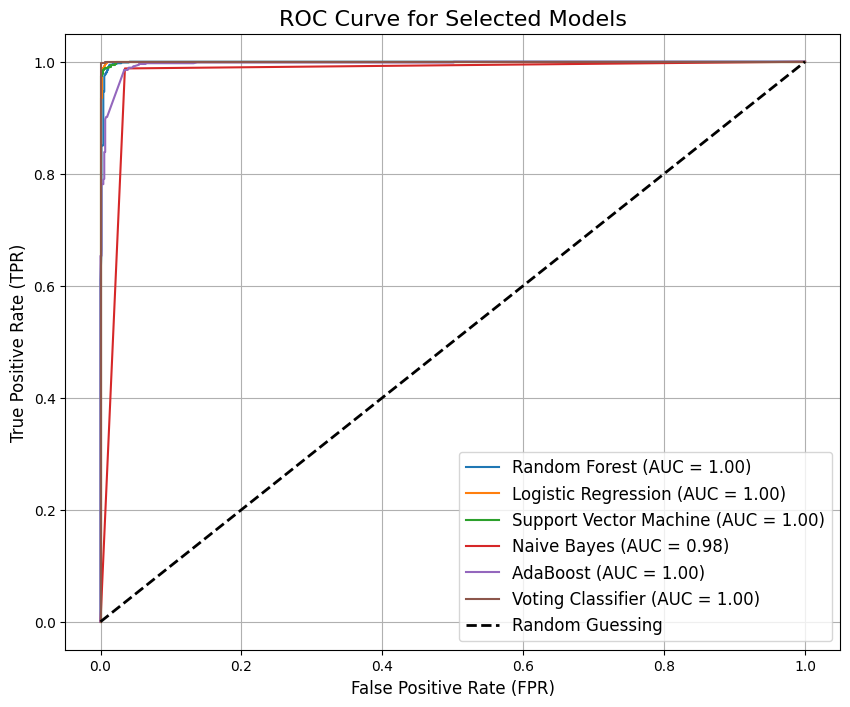

In [39]:
# Example Usage:
# Assuming X_train, y_train, X_test, y_test are your train/test datasets
X_train_dense, X_test_dense = convert_to_dense(X_train_smote, X_test_smote)
trained_models = train_models(X_train_dense, y_train_smote)
plot_roc_curves(trained_models, X_test_dense, y_test_smote)


The AUC values for most of the models (Random Forest, Logistic Regression, Support Vector Machine, AdaBoost, and Voting Classifier) are all at 1.00, indicating perfect discrimination between the classes. AUC = 1.00 means that these models are theoretically able to separate the positive and negative classes without any errors.
The Naive Bayes model has an AUC of 0.98, which is slightly lower but still indicates very high performance.

In [41]:
trained_models

{'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
 'Support Vector Machine': SVC(C=10, class_weight='balanced', probability=True, random_state=42),
 'Naive Bayes': GaussianNB(),
 'AdaBoost': AdaBoostClassifier(random_state=42),
 'Voting Classifier': VotingClassifier(estimators=[('lr',
                               LogisticRegression(class_weight='balanced',
                                                  random_state=42)),
                              ('rf',
                               RandomForestClassifier(class_weight='balanced',
                                                      random_state=42)),
                              ('gnb', MultinomialNB())],
                  voting='soft')}

In [ ]:
trained_models

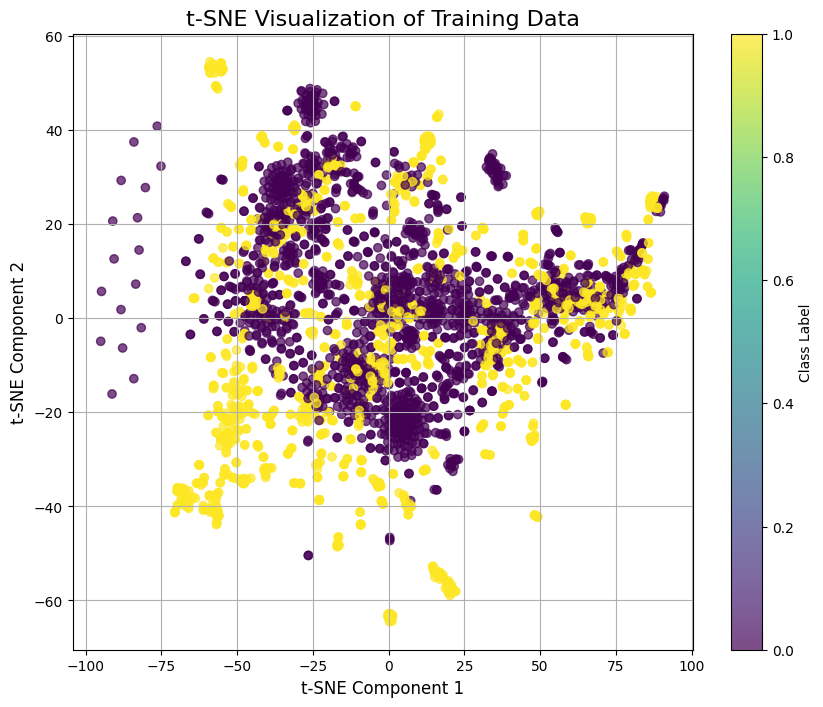

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(X, y, title="t-SNE Visualization"):
    """
    Applies t-SNE to reduce dimensionality and visualizes the data in a 2D plot.

    Parameters:
    - X: Feature matrix (can be dense or sparse, sparse will be converted).
    - y: Class labels.
    - title: Title for the plot.
    """
    # Convert to dense if sparse
    if hasattr(X, 'toarray'):
        X = X.toarray()
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label="Class Label")
    plt.title(title, fontsize=16)
    plt.xlabel("t-SNE Component 1", fontsize=12)
    plt.ylabel("t-SNE Component 2", fontsize=12)
    plt.grid(True)
    plt.show()

# Example Usage
# Assuming X_train and y_train are your dataset features and labels
plot_tsne(X_train_smote, y_train_smote, title="t-SNE Visualization of Training Data")


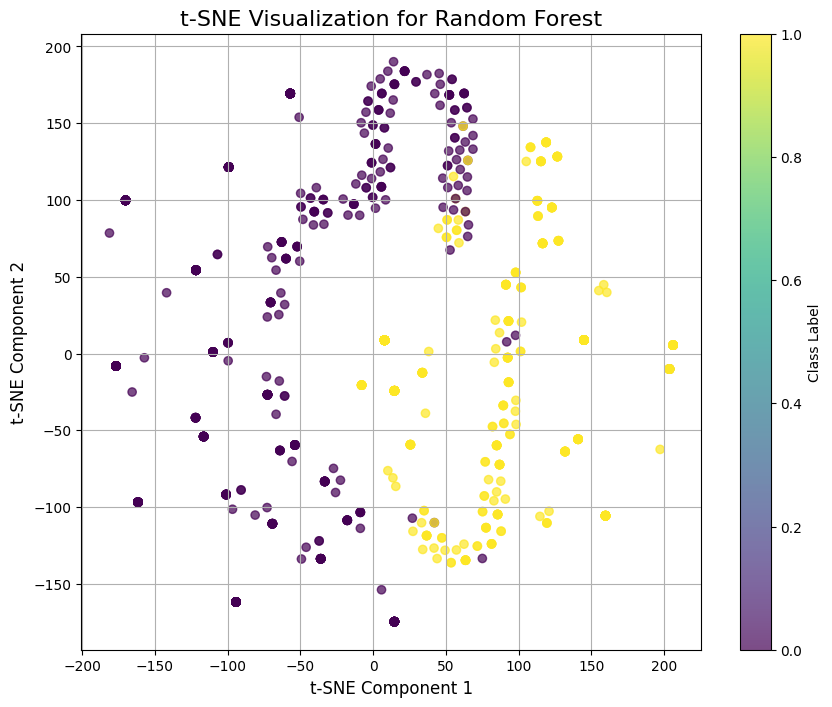

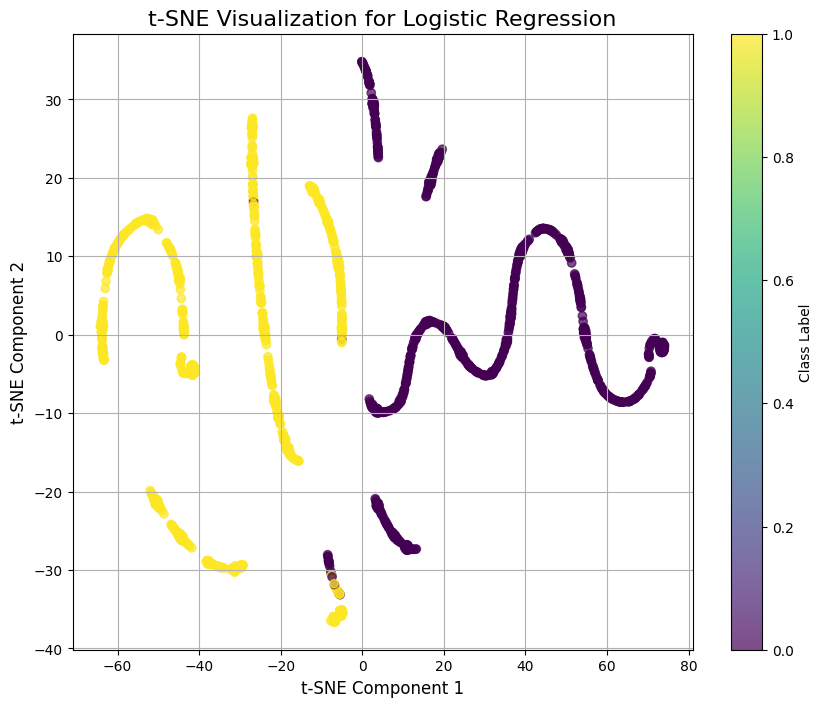

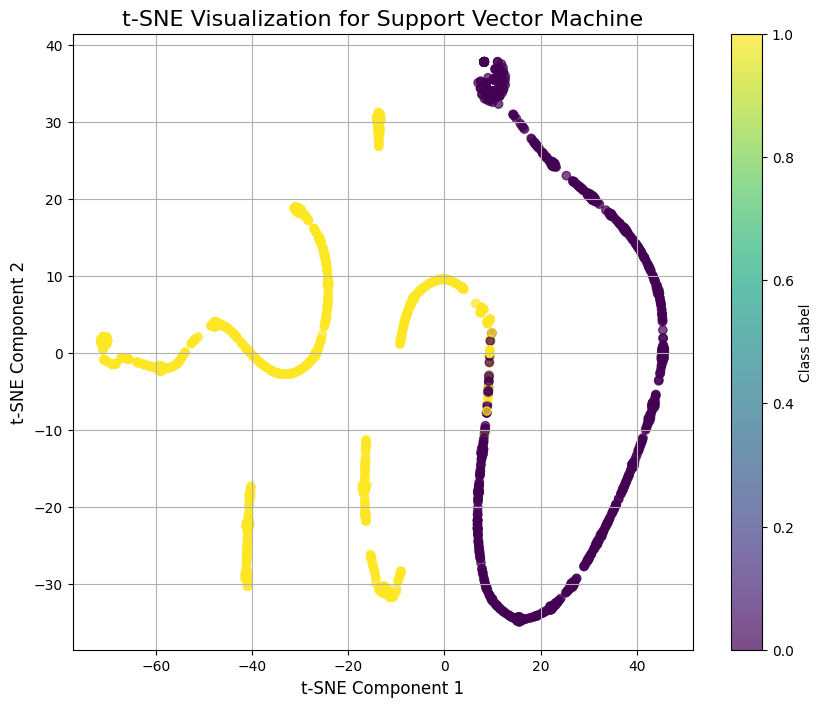

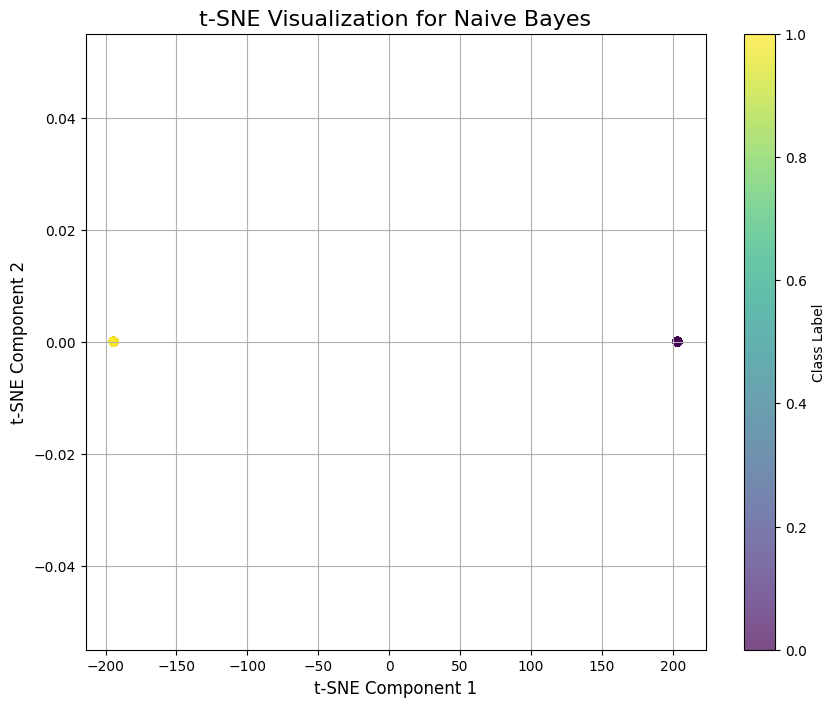

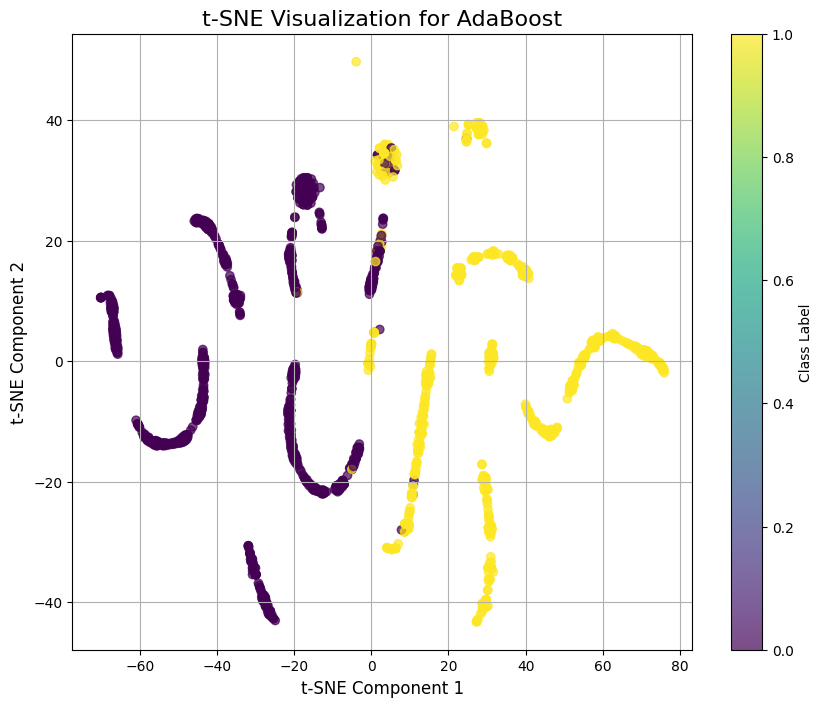

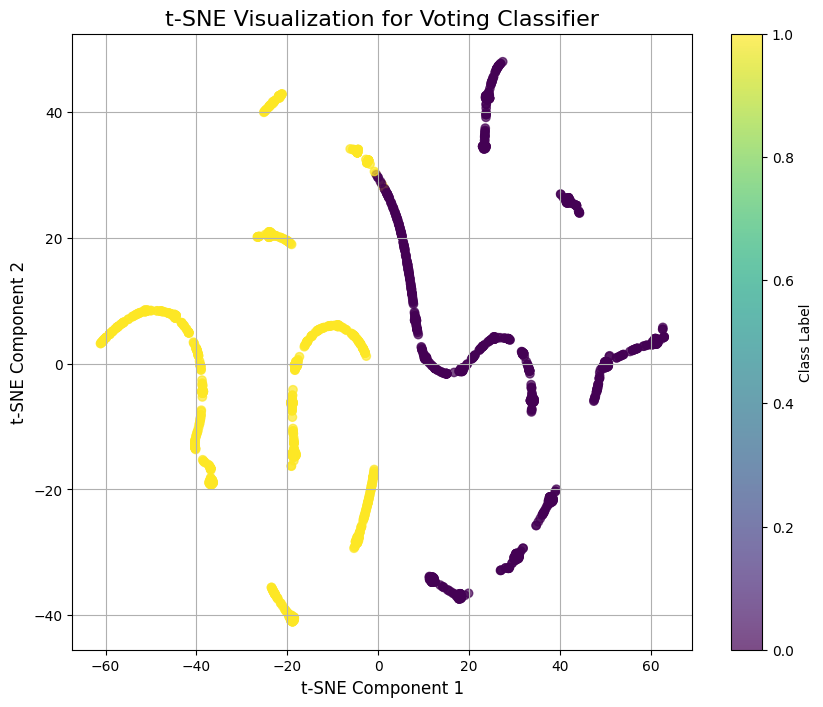

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def get_model_outputs(models, X):
    """
    Gets model outputs (probabilities or decision scores) for each model in the list.

    Parameters:
    - models: Dictionary of trained models {model_name: model_instance}.
    - X: Feature matrix to predict on (e.g., test data).

    Returns:
    - model_outputs: Dictionary of model outputs {model_name: output_matrix}.
    """
    model_outputs = {}
    
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            # Use probabilities for models that support it
            model_outputs[model_name] = model.predict_proba(X)
        elif hasattr(model, "decision_function"):
            # Use decision function for models like SVM
            model_outputs[model_name] = model.decision_function(X)
        else:
            print(f"Model {model_name} does not support probability predictions or decision scores.")
    
    return model_outputs

def plot_tsne_for_models(model_outputs, y, title_prefix="t-SNE Visualization for"):
    """
    Applies t-SNE to each model's output and visualizes the results.

    Parameters:
    - model_outputs: Dictionary of model outputs {model_name: output_matrix}.
    - y: True class labels.
    - title_prefix: Title prefix for each plot.
    """
    for model_name, outputs in model_outputs.items():
        # Apply t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        outputs_tsne = tsne.fit_transform(outputs)

        # Plotting
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(outputs_tsne[:, 0], outputs_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label="Class Label")
        plt.title(f"{title_prefix} {model_name}", fontsize=16)
        plt.xlabel("t-SNE Component 1", fontsize=12)
        plt.ylabel("t-SNE Component 2", fontsize=12)
        plt.grid(True)
        plt.show()

# Example Usage:
# Assuming X_test and y_test are your test dataset and labels, and trained_models is your dictionary of models
X_test_dense, y_test_dense = convert_to_dense(X_test_smote, y_test_smote)  # Convert to dense arrays if needed
model_outputs = get_model_outputs(trained_models, X_test_dense)  # Get model outputs
plot_tsne_for_models(model_outputs, y_test_smote, title_prefix="t-SNE Visualization for")  # Plot t-SNE


Best Separation: Logistic Regression, SVM, and the Voting Classifier show the best separation between classes in this t-SNE projection. These models form well-defined clusters with minimal overlap, indicating good class distinction.

In [52]:
import pandas as pd

# Data for the table
data = {
    "Model": ["Logistic Regression", "Support Vector Machine", "Voting Classifier(LogisticRegression,,RandomForest)"],
    "Train Accuracy (%)": [99.97, 99.29, 99.97],
    "Test Accuracy (%)": [98.93, 98.67, 99.60],
    "Accuracy Diff (%)": [1.04, 0.62, 0.37],
    "Conclusion": [
        "High training and test accuracy, showing strong performance with minimal overfitting.",
        "Excellent training and test performance with low overfitting, indicating strong generalization.",
        "Outstanding performance with very high accuracy and the smallest accuracy difference, best generalization among models."
    ]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table using tabulate
table = tabulate(df, headers="keys", tablefmt="grid", showindex=False)
print(table)

+-----------------------------------------------------+----------------------+---------------------+---------------------+-------------------------------------------------------------------------------------------------------------------------+
| Model                                               |   Train Accuracy (%) |   Test Accuracy (%) |   Accuracy Diff (%) | Conclusion                                                                                                              |
+=====================================================+======================+=====================+=====================+=========================================================================================================================+
| Logistic Regression                                 |                99.97 |               98.93 |                1.04 | High training and test accuracy, showing strong performance with minimal overfitting.                                   |
+-------------------

All three models have LowBias and LowVariance 